1) DFS iterative

In [9]:
!pip3 install networkx

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import time

def visualize_dfs_step(G, pos, current_node, visited, stack, path):
    plt.figure(figsize=(8, 4))

    nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=500)

    nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='lightgreen')  # Посещенные
    if current_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[current_node], node_color='red')  # Текущая
    nx.draw_networkx_nodes(G, pos, nodelist=stack, node_color='orange')  # В стеке

    title = f"Текущая: {current_node}\nПуть: {' → '.join(path)}\nСтек: {stack}"
    plt.title(title, fontsize=10)
    plt.tight_layout()

    display(plt.gcf())
    clear_output(wait=True)
    plt.close()

def DFS(G, start, delay=1.0):
    if not G.has_node(start):
        raise ValueError('Неправильная точка входа')

    pos = nx.spring_layout(G)
    stack = [start]
    visited = set()
    path = []
    figures = []

    while stack:
        cur = stack.pop()
        if cur not in visited:
            path.append(str(cur))
            visited.add(cur)
            stack.extend(reversed(list(G.neighbors(cur))))

            fig, ax = plt.subplots(figsize=(8, 4))

            nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=500, ax=ax)

            nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='lightgreen', ax=ax)
            nx.draw_networkx_nodes(G, pos, nodelist=[cur], node_color='red', ax=ax)
            nx.draw_networkx_nodes(G, pos, nodelist=stack, node_color='orange', ax=ax)

            title = f"Шаг {len(path)}: Текущая: {cur}\nПуть: {' → '.join(path)}\nСтек: {stack}"
            plt.title(title, fontsize=10)
            plt.tight_layout()

            figures.append(fig)
            plt.show()
            time.sleep(delay)

    print("Финальный результат обхода:", ' → '.join(path))
    return figures

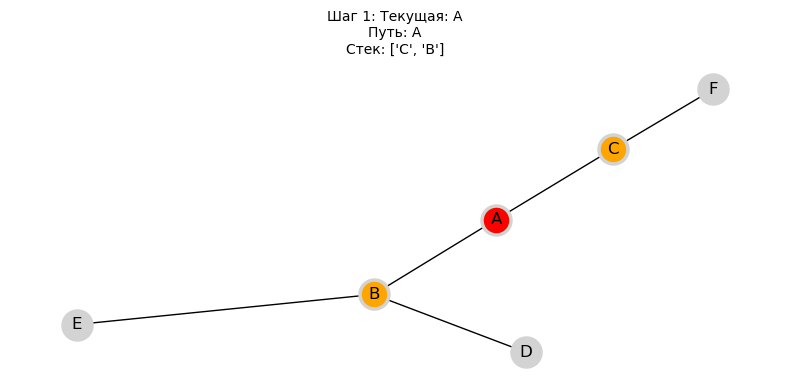

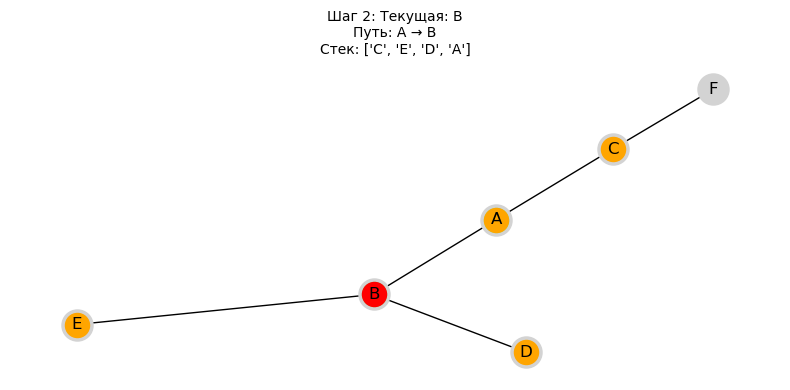

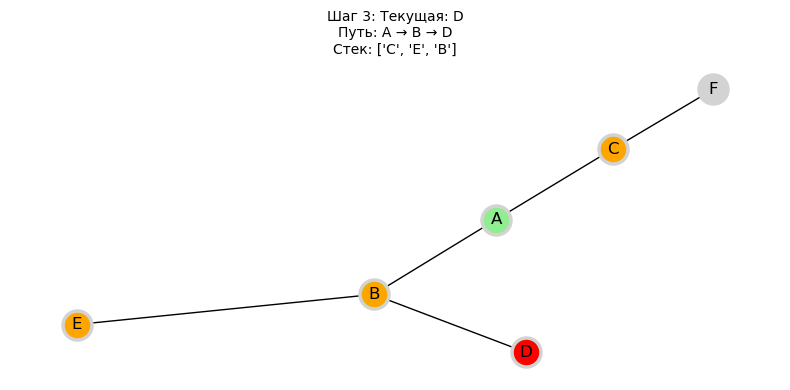

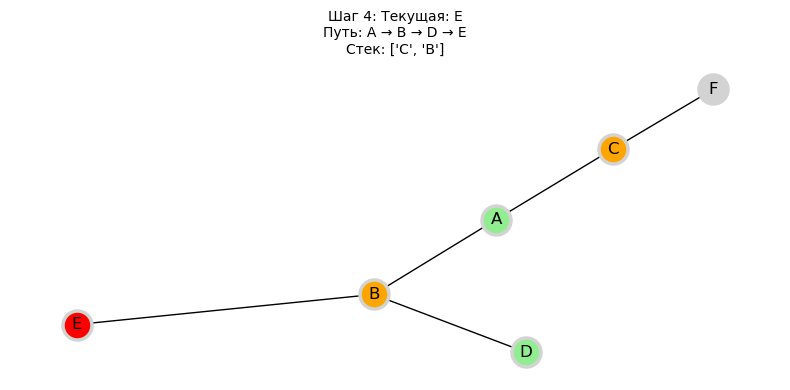

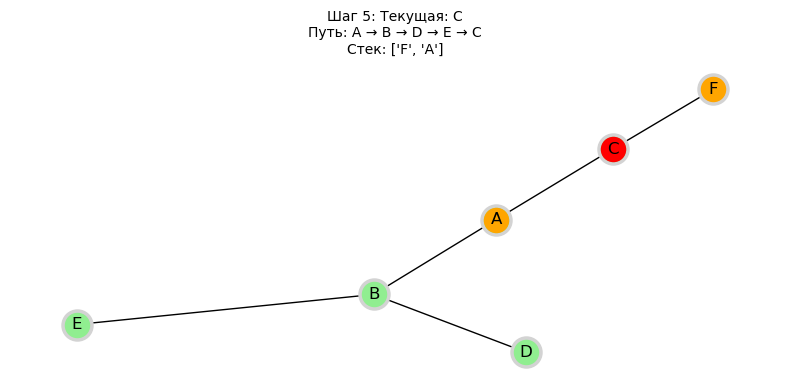

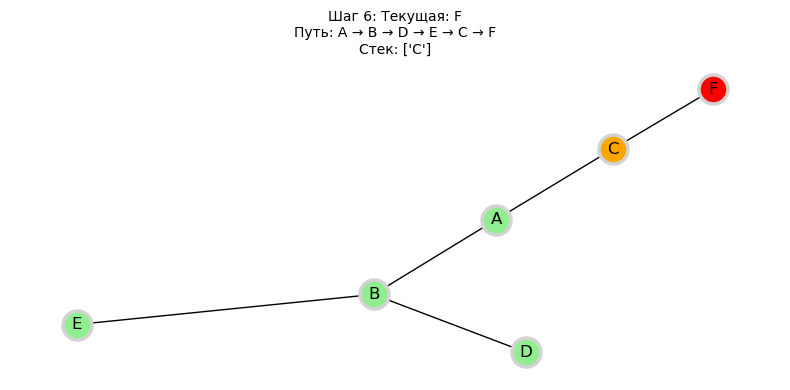


Финальный результат обхода: A → B → D → E → C → F


[<Figure size 800x400 with 1 Axes>,
 <Figure size 800x400 with 1 Axes>,
 <Figure size 800x400 with 1 Axes>,
 <Figure size 800x400 with 1 Axes>,
 <Figure size 800x400 with 1 Axes>,
 <Figure size 800x400 with 1 Axes>]

In [12]:
G = nx.Graph()
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F')]
G.add_edges_from(edges)

DFS(G, 'A', delay=0.5)


2) BFS

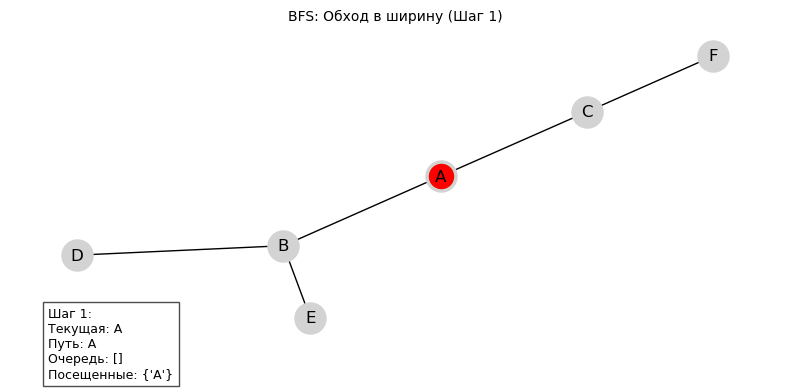

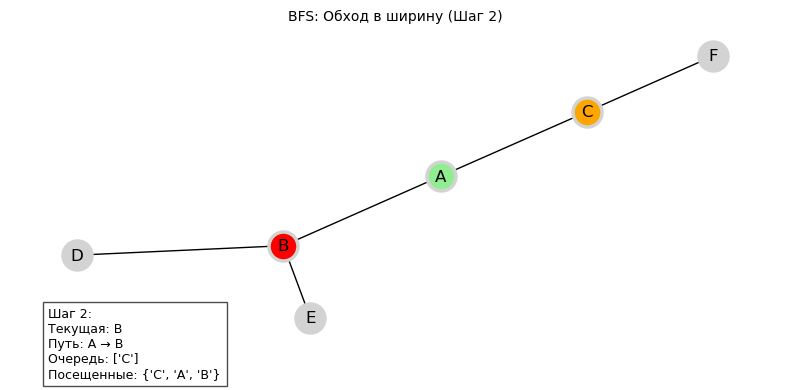

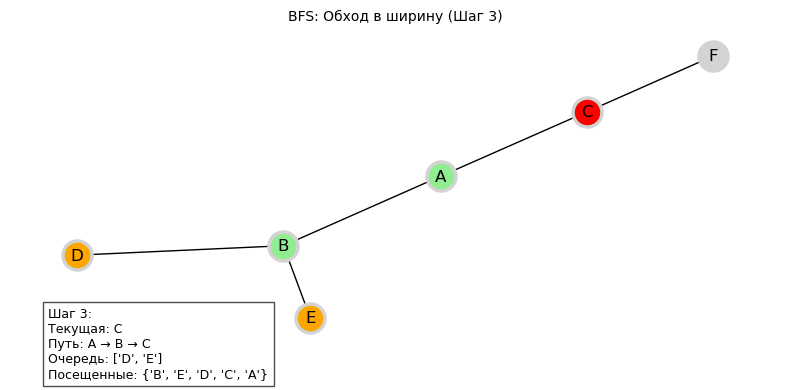

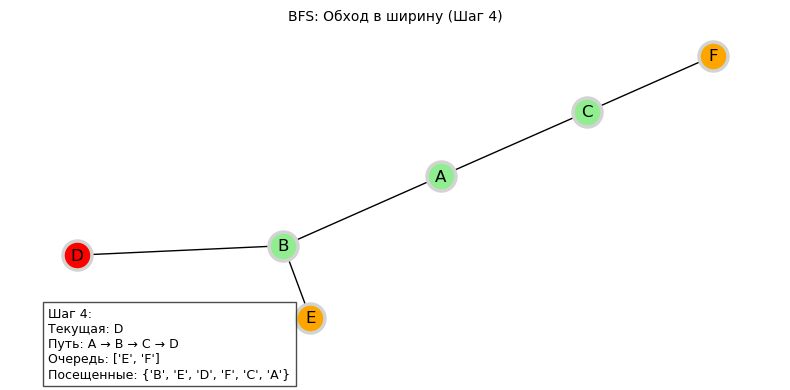

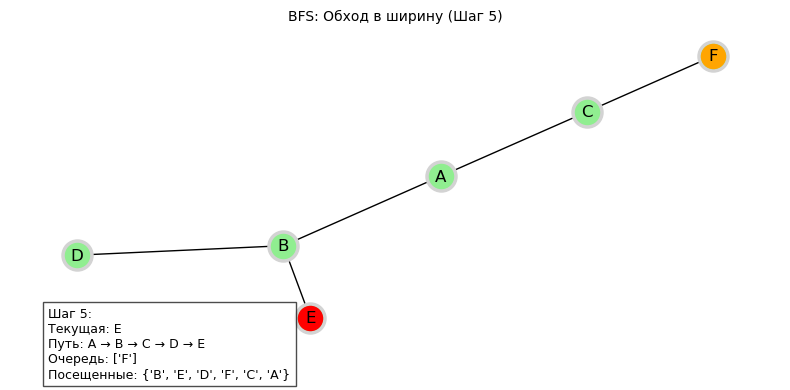

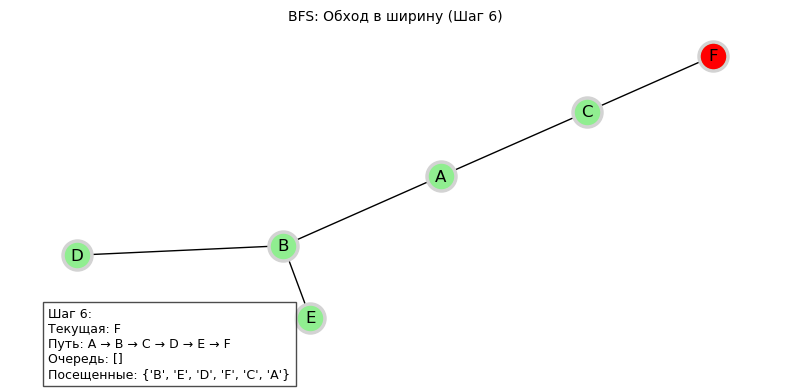


Финальный порядок обхода: A → B → C → D → E → F


[<Figure size 800x400 with 1 Axes>,
 <Figure size 800x400 with 1 Axes>,
 <Figure size 800x400 with 1 Axes>,
 <Figure size 800x400 with 1 Axes>,
 <Figure size 800x400 with 1 Axes>,
 <Figure size 800x400 with 1 Axes>]

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import time

def BFS(G, start, delay=1.0):
    if not G.has_node(start):
        raise ValueError('Неверное начальное значение')
    
    pos = nx.spring_layout(G)
    queue = [start]
    visited = set([start])
    path = []
    figures = []
    
    step = 0
    while queue:
        step += 1
        cur = queue.pop(0)
        path.append(str(cur))
        
        fig, ax = plt.subplots(figsize=(8, 4))
        nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=500, ax=ax)
        
        nx.draw_networkx_nodes(G, pos, nodelist=list(visited), node_color='lightgreen', ax=ax)
        nx.draw_networkx_nodes(G, pos, nodelist=[cur], node_color='red', ax=ax)
        nx.draw_networkx_nodes(G, pos, nodelist=queue, node_color='orange', ax=ax)
        
        info_text = f"Шаг {step}:\nТекущая: {cur}\nПуть: {' → '.join(path)}\nОчередь: {queue}\nПосещенные: {visited}"
        plt.text(0.05, -0.1, info_text, transform=ax.transAxes, fontsize=9, 
                bbox=dict(facecolor='white', alpha=0.7))
        
        plt.title(f"BFS: Обход в ширину (Шаг {step})", fontsize=10)
        plt.tight_layout()
        figures.append(fig)
        plt.show()
        time.sleep(delay)
        
        for neighbor in G.neighbors(cur):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    
    print("\nФинальный порядок обхода:", ' → '.join(path))
    return figures

BFS(G, 'A')

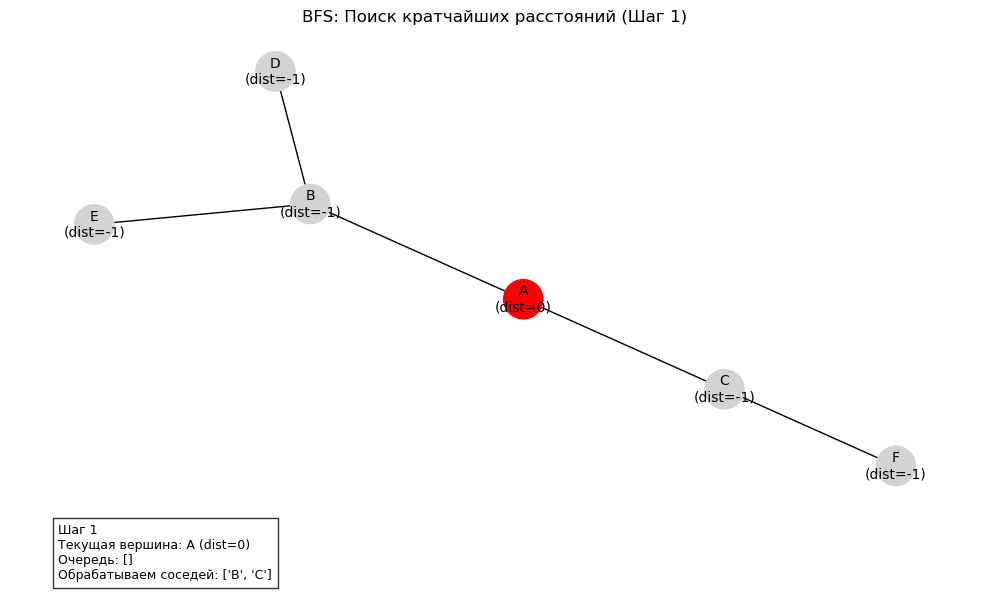

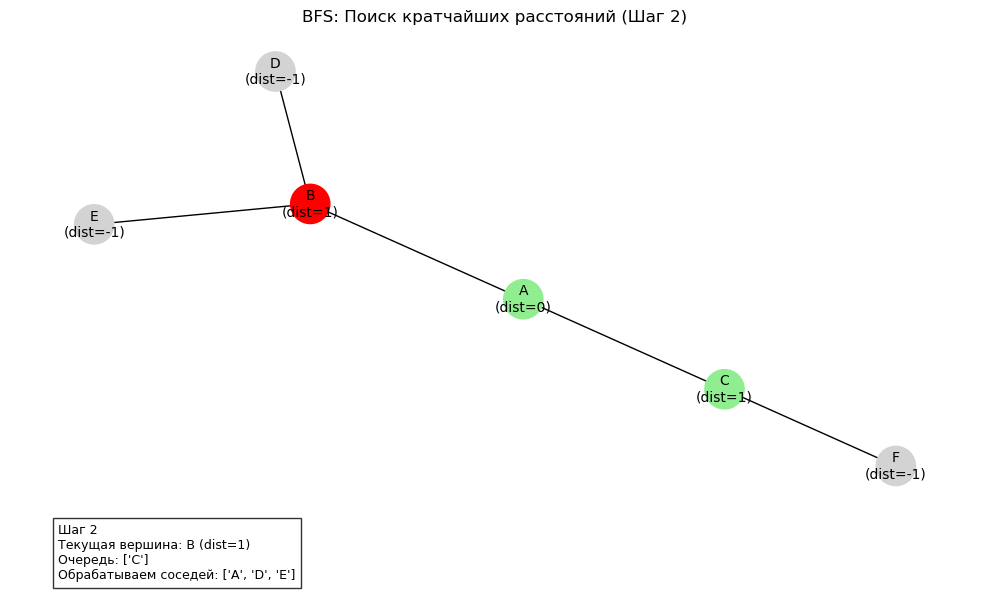

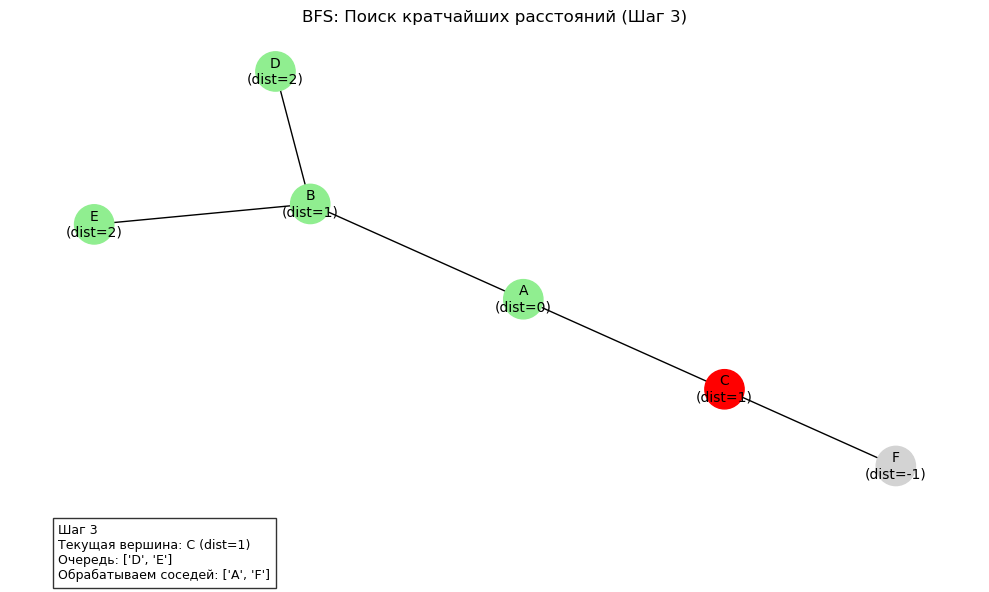

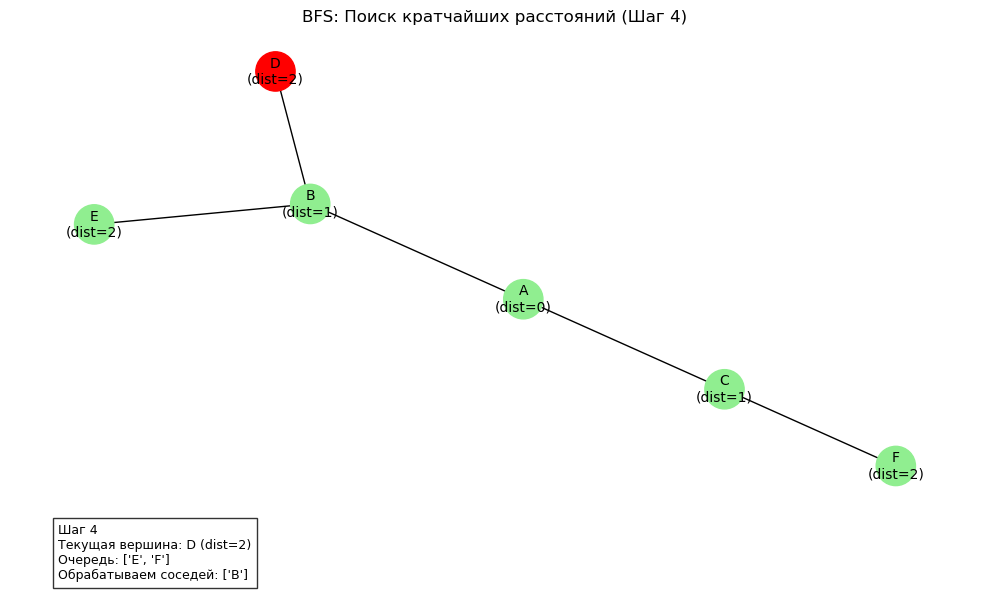

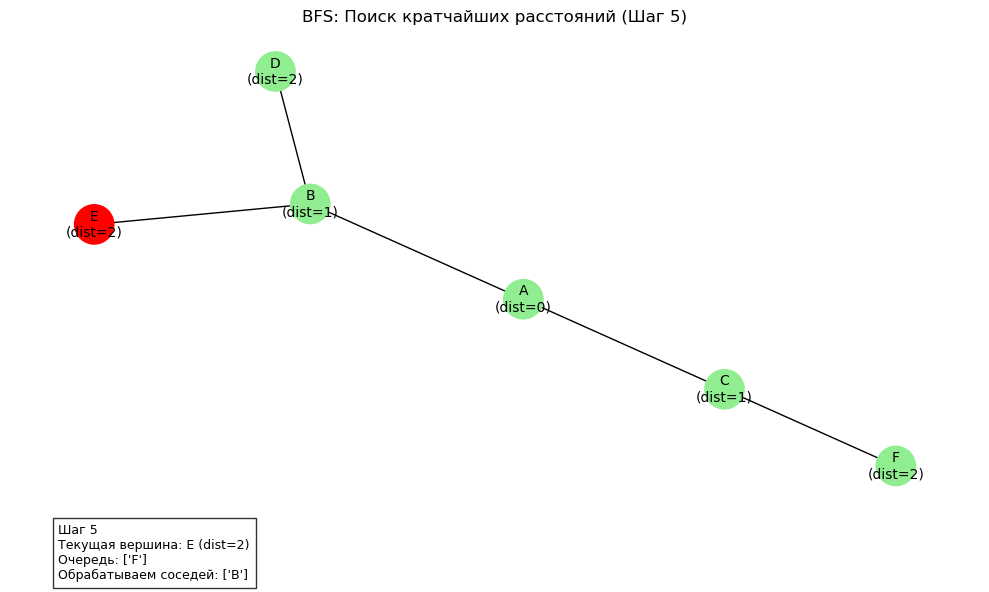

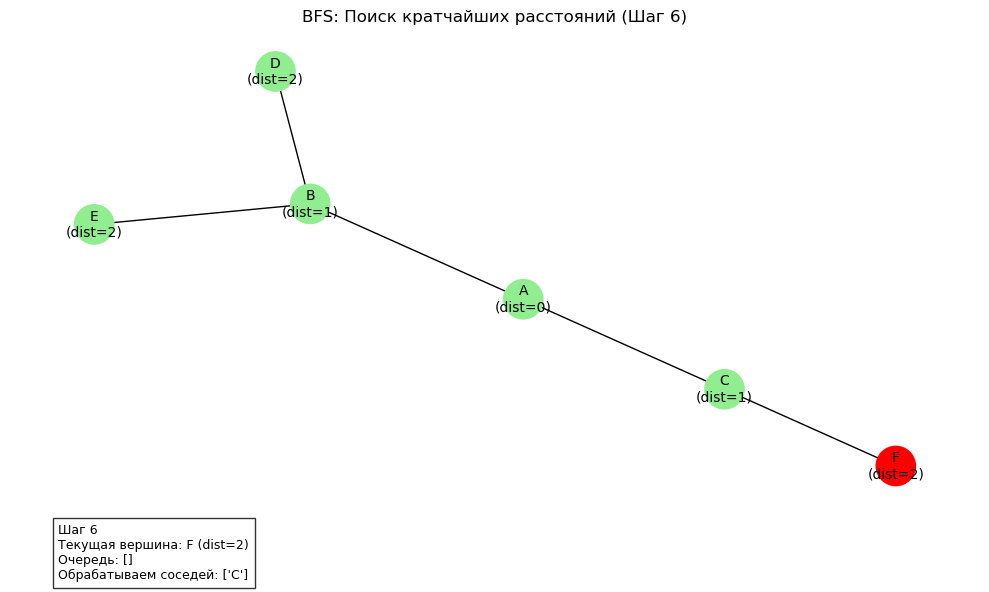


Финальные расстояния:
A: 0
B: 1
C: 1
D: 2
E: 2
F: 2


({'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2},
 [<Figure size 1000x600 with 1 Axes>,
  <Figure size 1000x600 with 1 Axes>,
  <Figure size 1000x600 with 1 Axes>,
  <Figure size 1000x600 with 1 Axes>,
  <Figure size 1000x600 with 1 Axes>,
  <Figure size 1000x600 with 1 Axes>])

In [15]:
def BFS_search(G, start, delay=1.0):
    if start not in G:
        raise ValueError("Неправильная точка входа!")
    
    pos = nx.spring_layout(G)
    queue = [start]
    dist = {node: -1 for node in G.nodes()}
    dist[start] = 0
    figures = []
    
    step = 0
    while queue:
        step += 1
        cur = queue.pop(0)
        
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Цвета вершин
        node_colors = []
        for node in G.nodes():
            if node == cur:
                node_colors.append('red')
            elif dist[node] != -1:
                node_colors.append('lightgreen')
            else:
                node_colors.append('lightgray')
        
        nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=800, ax=ax)
        
        labels = {node: f"{node}\n(dist={dist[node]})" for node in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels, font_size=10, ax=ax)
        
        info = (f"Шаг {step}\n"
                f"Текущая вершина: {cur} (dist={dist[cur]})\n"
                f"Очередь: {queue}\n"
                f"Обрабатываем соседей: {list(G.neighbors(cur))}")
        plt.text(0.05, -0.15, info, transform=ax.transAxes, 
                bbox=dict(facecolor='white', alpha=0.8), fontsize=9)
        
        plt.title(f"BFS: Поиск кратчайших расстояний (Шаг {step})", fontsize=12)
        plt.tight_layout()
        figures.append(fig)
        plt.show()
        time.sleep(delay)
        
        for neighbor in G.neighbors(cur):
            if dist[neighbor] == -1:
                dist[neighbor] = dist[cur] + 1
                queue.append(neighbor)
    
    print("\nФинальные расстояния:")
    for node, d in dist.items():
        print(f"{node}: {d}")
    
    return dist, figures

BFS_search(G, 'A')

4) Препятствия

In [19]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 6.7 MB/s eta 0:00:06
   ------ --------------------------------- 6.0/39.5 MB 19.5 MB/s eta 0:00:02
   ------------------- -------------------- 19.7/39.5 MB 38.8 MB/s eta 0:00:01
   --------------------- ------------------ 21.2/39.5 MB 31.3 MB/s eta 0:00:01
   -------------------------- ------------- 26.0/39.5 MB 27.9 MB/s eta 0:00:01
   ---------------------------------- ----- 33.8/39.5 MB 29.4 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 29.8 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 28.9 MB/s eta 0:00:00


In [ ]:
#не вышло

5) Реализуйте топологическую сортировку графа с помощью dfs

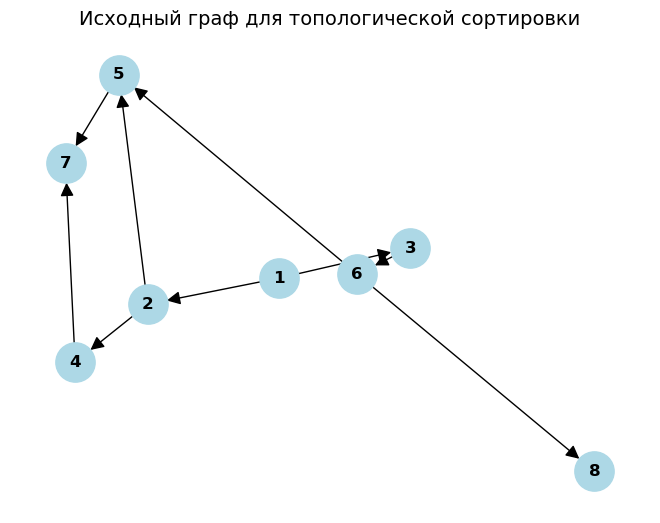

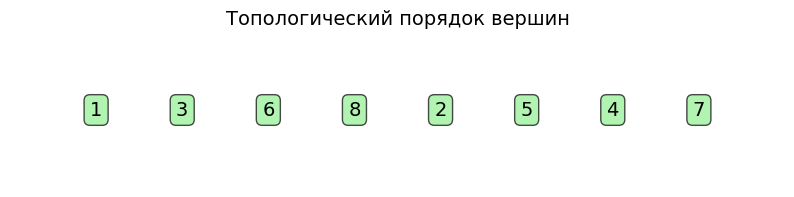

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
from time import sleep

def topological_sort_dfs(graph):
    visited = set()
    temp_visited = set()
    result = []
    step = 1
    indent = 0 
    
    def dfs(node):
        nonlocal step, indent
        
        step += 1
        
        if node in temp_visited:
            return False
            
        if node in visited:
            return True
            
        temp_visited.add(node)
        
        indent += 1
        
        for neighbor in sorted(graph.neighbors(node)):
            if not dfs(neighbor):
                return False
            sleep(0.3)
        
        indent -= 1
        
        temp_visited.remove(node)
        visited.add(node)
        result.append(node)
        
        return True
    
    for node in sorted(graph.nodes()):
        if node not in visited:
            if not dfs(node):
                return None
            sleep(0.5)
    
    final_order = result[::-1]
    
    return final_order

G = nx.DiGraph()
G.add_edges_from([
    (1, 2), (1, 3),
    (2, 4), (2, 5),
    (3, 6),
    (4, 7),
    (5, 7),
    (6, 5), (6, 8)
])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, 
        font_size=12, font_weight='bold', arrowsize=20)
plt.title("Исходный граф для топологической сортировки", fontsize=14)
plt.show()

sorted_nodes = topological_sort_dfs(G)

# Визуализация результата
if sorted_nodes:
    plt.figure(figsize=(10, 2))
    for i, node in enumerate(sorted_nodes):
        plt.text(i, 0, str(node), ha='center', va='center', 
                bbox=dict(facecolor='lightgreen', boxstyle='round', alpha=0.7),
                fontsize=14)
    plt.xlim(-1, len(sorted_nodes))
    plt.ylim(-0.5, 0.5)
    plt.axis('off')
    plt.title("Топологический порядок вершин", fontsize=14)
    plt.show()

7) Дейкстра

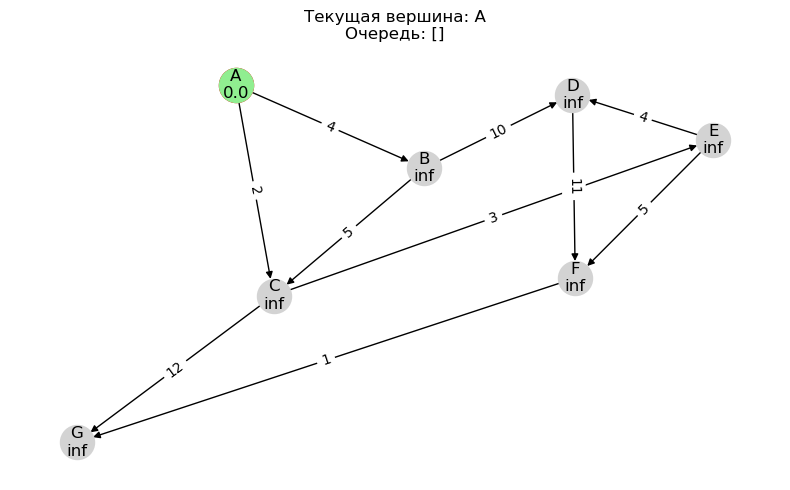

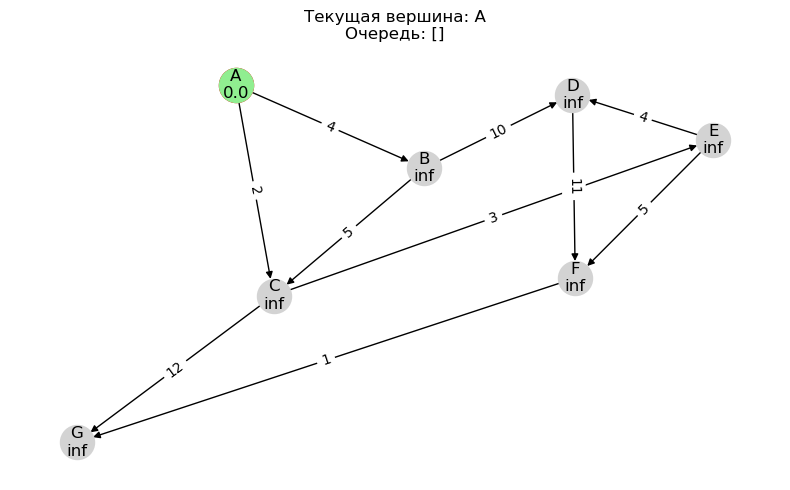

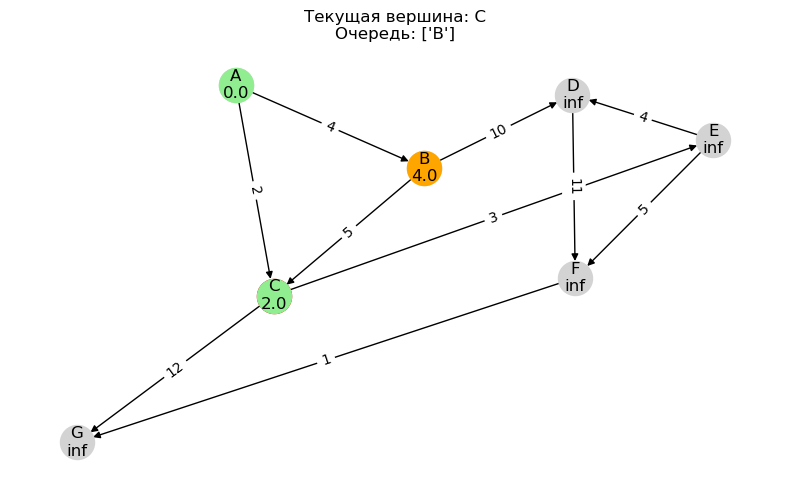

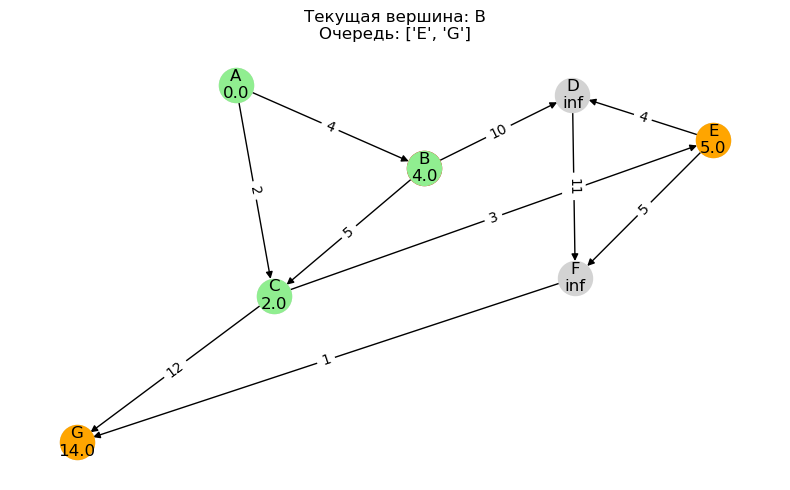

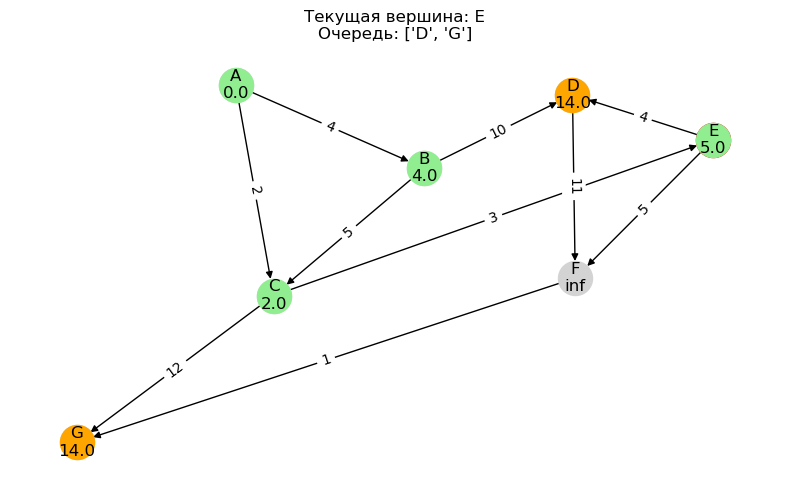

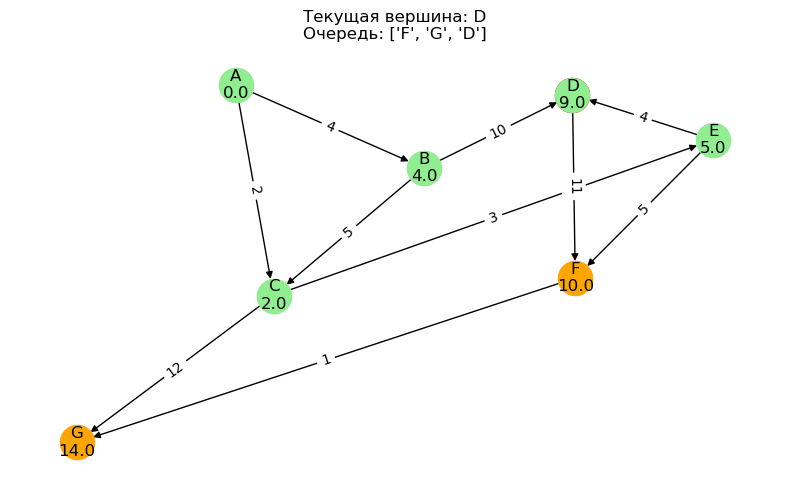

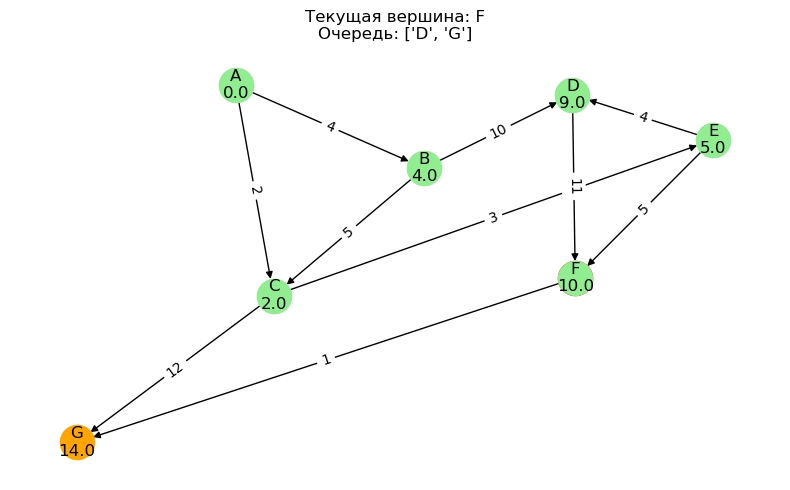

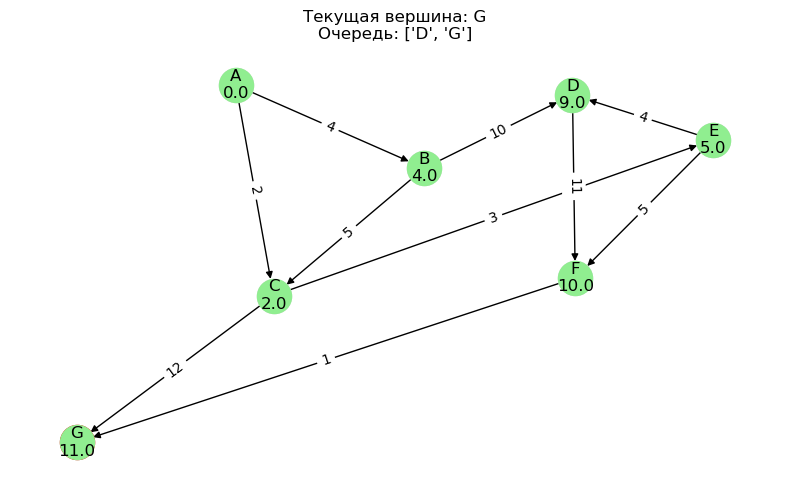

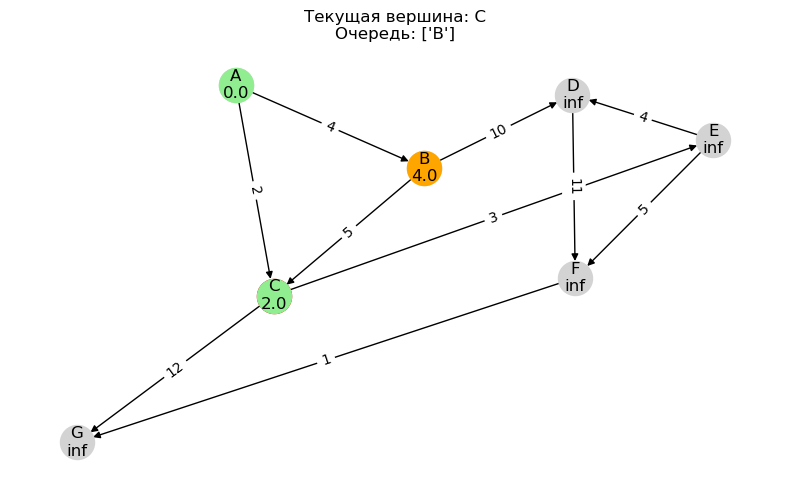

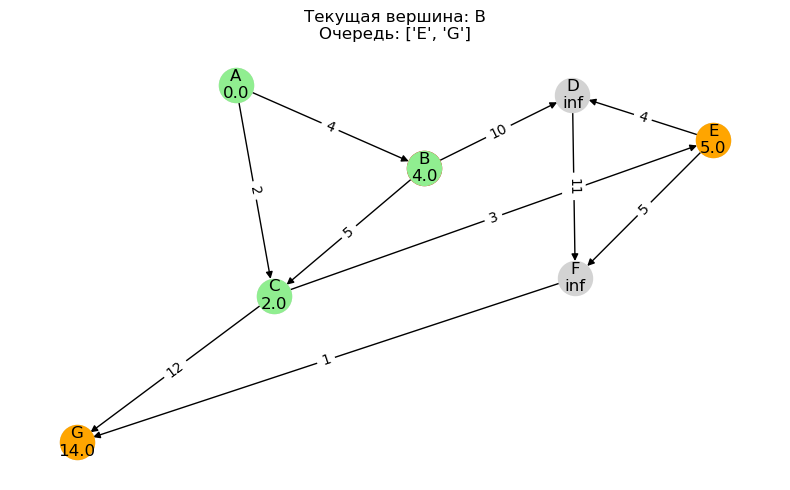

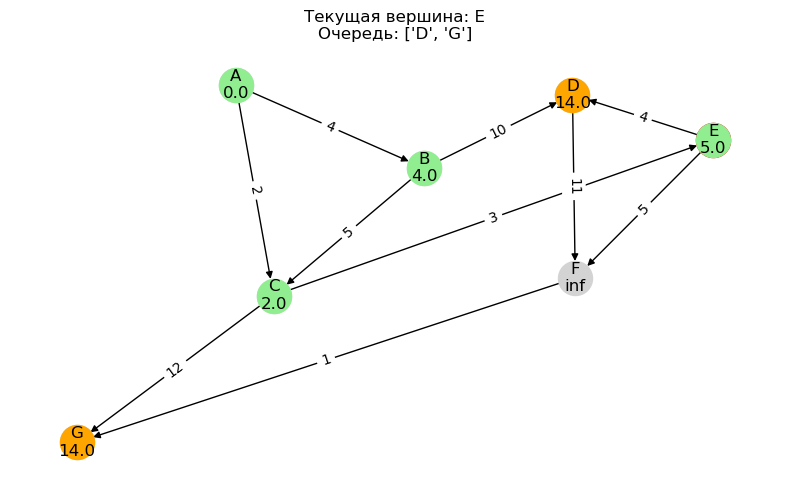

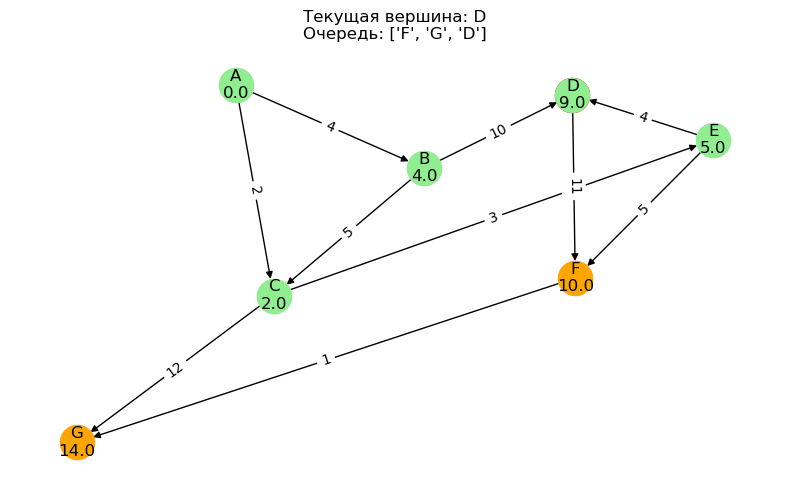

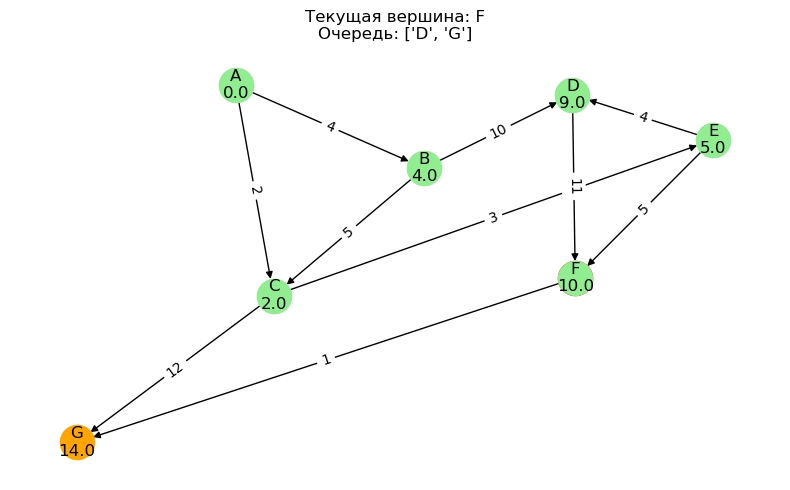

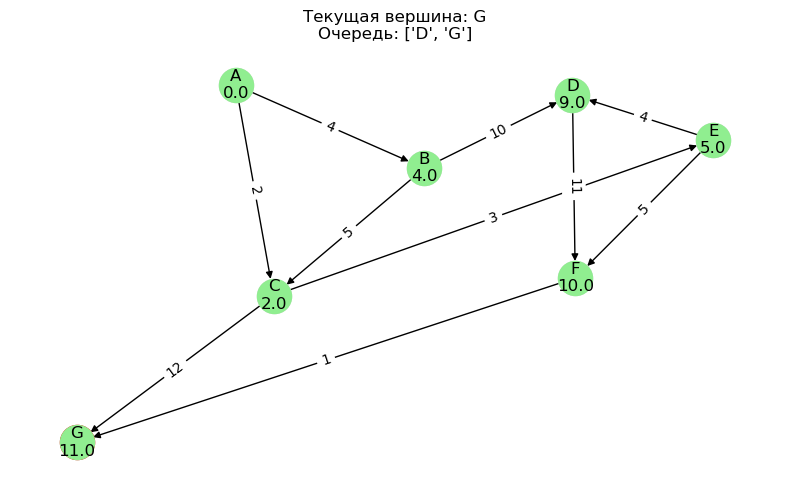

Финальные расстояния:
A: 0
B: 4
C: 2
D: 9
E: 5
F: 10
G: 11


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import time
from IPython.display import display

def capture_dijkstra_step(G, pos, current, visited, queue, distances, figures):
    fig, ax = plt.subplots(figsize=(8, 5))
    labels = {node: f"{node}\n{distances[node]:.1f}" for node in G.nodes}

    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightgray', node_size=600, ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, ax=ax)

    if current:
        nx.draw_networkx_nodes(G, pos, nodelist=[current], node_color='red', node_size=600, ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='lightgreen', node_size=600, ax=ax)
    queue_nodes = [v for _, v in queue if v not in visited]
    nx.draw_networkx_nodes(G, pos, nodelist=queue_nodes, node_color='orange', node_size=600, ax=ax)

    title = f"Текущая вершина: {current}\nОчередь: {[v for _, v in queue]}"
    ax.set_title(title)
    plt.tight_layout()
    figures.append(fig)

def dijkstra_visual_persistent(G, start):
    distances = {node: float('inf') for node in G.nodes}
    distances[start] = 0
    queue = [(0, start)]
    visited = set()
    pos = nx.spring_layout(G)
    figures = []

    while queue:
        cur_dist, u = heapq.heappop(queue)
        if u in visited:
            continue
        visited.add(u)

        capture_dijkstra_step(G, pos, u, visited, queue, distances, figures)

        for v in G.neighbors(u):
            weight = G[u][v]['weight']
            new_dist = distances[u] + weight
            if new_dist < distances[v]:
                distances[v] = new_dist
                heapq.heappush(queue, (new_dist, v))

    # Показ всех шагов по очереди
    for fig in figures:
        display(fig)
        plt.pause(1)
        plt.close(fig)

    print("Финальные расстояния:")
    for node in G.nodes:
        print(f"{node}: {distances[node]}")


G = nx.DiGraph()
edges = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 5),
    ('B', 'D', 10),
    ('C', 'E', 3),
    ('E', 'D', 4),
    ('D', 'F', 11),
    ('E', 'F', 5),
    ('F', 'G', 1),
    ('C', 'G', 12),
]
G.add_weighted_edges_from(edges)

dijkstra_visual_persistent(G, 'A')
